In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. Logistic Regression

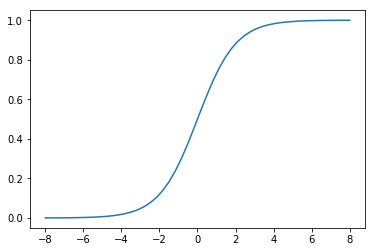

In [184]:
## logistic function
# This is the inverse of what we show in class
def logistic(x):
    return 1 / (1 + np.exp(-x))


xx = np.linspace(-8, 8)
plt.plot(xx, logistic(xx))
plt.show()

In [185]:
np.random.seed(5)
n_sample = 100
a = 3.0
b = -9.0

x = np.random.uniform(1, 5, size=n_sample)
x = np.sort(x)

q = logistic(a * x + b)
y = np.random.binomial(n=1, p=q)

X, y = sm.add_constant(x), y

In [186]:
print(X[:5])
print(y[:15])

[[1.         1.00656869]
 [1.         1.00885685]
 [1.         1.04947765]
 [1.         1.08156551]
 [1.         1.09173237]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [187]:
# Fit Logistic regression
model = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.logit())).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.508
Date:                Wed, 21 Apr 2021   Deviance:                       63.016
Time:                        17:21:01   Pearson chi2:                     109.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0444      1.385     -5.087      0.000      -9.758      -4.330
x1             2.4211      0.465      5.207      0.000       1.510       3.332
==============================================================================
"""

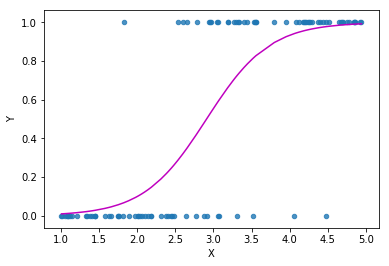

In [188]:
y_pred = model.predict(X)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Confusion Matrix

In [189]:
from sklearn.metrics import confusion_matrix
y_true = y
y_pred_class = (y_pred > 0.5)
confusion_matrix(y_true, y_pred_class)

array([[42,  7],
       [ 5, 46]])

### ROC Curve

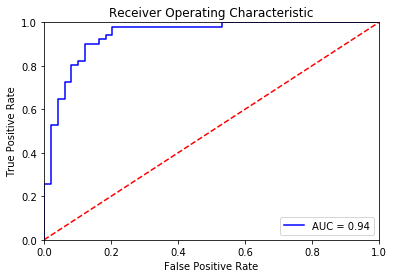

In [190]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
y_pred = model.predict(exog)
fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Other ways of Logistic Regression

### 1st way

In [191]:
model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.315079
         Iterations 7


In [192]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Wed, 21 Apr 2021   Pseudo R-squ.:                  0.5453
Time:                        17:21:03   Log-Likelihood:                -31.508
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 3.520e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0444      1.385     -5.087      0.000      -9.758      -4.330
x1             2.4211      0.465      5.207      0.000       1.510       3.332
==============================================================================
"""

### 2nd way

In [194]:
from sklearn.linear_model import LogisticRegression
# sklearn output
model = LogisticRegression(solver='lbfgs',fit_intercept = False, C = 1e9)
mdl = model.fit(X, y)
model.coef_

array([[-7.04458208,  2.42114067]])

# 2. Multinomial Logistic Regression

In [200]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [201]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial',C = 1e9)
lr.fit(X,y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [202]:
lr.coef_

array([[  7.35271466,  20.39778454, -30.26348739, -14.14337754],
       [ -2.44376492,  -6.85843959,  10.41704506,  -2.07138612],
       [ -4.90894974, -13.53934495,  19.84644233,  16.21476366]])

In [203]:
lr.intercept_

array([  3.97750564,  19.33027251, -23.30777816])

In [204]:
confusion_matrix(y,lr.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

# 3. Poisson Regression

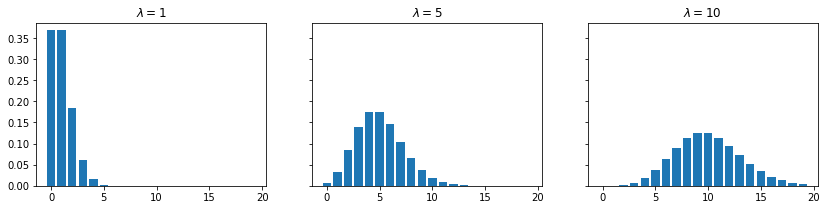

In [62]:
import scipy as sp
## Poissson distribution
fig, axes = plt.subplots(1, 3, figsize=(14, 3), sharey=True)

xx = np.arange(20)
lambdas = [1, 5, 10]

for i, lam in enumerate(lambdas):
    yy = sp.stats.poisson.pmf(xx, lam)
    axes[i].bar(xx, yy)
    axes[i].set_title(r'$\lambda={}$'.format(lam))

plt.show()

In [64]:
## Poisson regression

# generate simulation data
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

x = np.random.uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = np.random.poisson(mu)

In [66]:
print(x[:5])
print(y[:5])

[1.88797268 4.48292922 1.82687662 4.67444363 2.95364476]
[ 2 11  7  5  3]


In [68]:
X, y = sm.add_constant(x), y
model = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log())).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -213.95
Date:                Wed, 21 Apr 2021   Deviance:                       120.86
Time:                        11:28:50   Pearson chi2:                     115.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2789      0.162     -1.720      0.085      -0.597       0.039
x1             0.5646      0.042     13.508      0.000       0.483       0.647
==============================================================================
"""

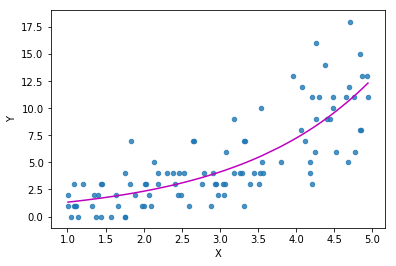

In [70]:
y_pred = model.predict(X)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# 4. Custom GLM

In [72]:
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.8

x = np.random.uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = np.random.normal(mu, sd)

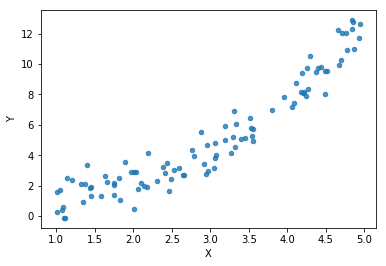

In [73]:
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [74]:
X,y = sm.add_constant(x),y

# Normal distribution + log link function
model = sm.GLM(y, X, family=sm.families.Gaussian(sm.families.links.log())).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:                    log   Scale:                         0.69261
Method:                          IRLS   Log-Likelihood:                -122.53
Date:                Wed, 21 Apr 2021   Deviance:                       67.876
Time:                        15:39:30   Pearson chi2:                     67.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3115      0.075     -4.130      0.000      -0.459      -0.164
x1             0.5789      0.018     32.984      0.000       0.545       0.613
==============================================================================
"""

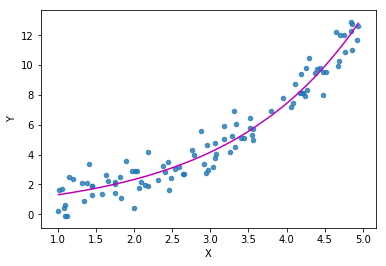

In [77]:
y_pred = model.predict(X)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()